# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

# 데이터 수집
- 서울시 자치구 년도별 CCTV 설치 현황
https://opengov.seoul.go.kr/data/11124500

- 서울시 서울통계, 서울시 주민등록인구 (구별) 통계
https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

## 1. 엑셀파일 읽기 - 서울시 자치구별 CCTV

In [1]:
import pandas as pd

In [4]:
CCTV_Seoul = pd.read_excel('data/01. CCTV_in_Seoul_2018.xlsx', sheet_name='Excel_Import_1')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [5]:
# 기관명 => 구별
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
CCTV_Seoul['구별'] = CCTV_Seoul['구별'].str.replace(' ','')
CCTV_Seoul['구별']

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object

## 2. 엑셀파일 읽기 - 서울시 인구현황

In [8]:
pop_Seoul = pd.read_excel('data/01. population_in_Seoul_2018.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018,합계,4263868,10049607,4910849,5138758,9765623,4773899,4991724,283984,136950,147034,2.29,1416131
3,2018,종로구,73735,163026,79156,83870,153065,74825,78240,9961,4331,5630,2.08,26742
4,2018,중구,61502,135633,66674,68959,125725,61947,63778,9908,4727,5181,2.04,22005


In [9]:
# 세번째줄, 자치구(B), 계: D,G,J, 65세고령자(N) 필드만 읽기
pop_Seoul = pd.read_excel('data/01. population_in_Seoul_2018.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [10]:
# 인구수계= 한국인수+외국인
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


# 3. Pandas 기초 복습

In [11]:
import pandas as pd
import numpy as np

In [12]:
# Series 데이터
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [13]:
# 시계열 데이터
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036
2013-01-06,0.809317,1.290695,-0.694822,-0.587238


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.95185138, -0.31881404,  0.80279691, -0.20824243],
       [ 1.43333314, -0.92359117,  0.49050813, -1.1700188 ],
       [-0.10314302, -0.42851774,  1.11385255, -0.75554052],
       [-0.90164722, -0.1763846 , -0.11005636, -0.36732025],
       [-1.04364906, -1.45903486,  1.42222103, -0.99203572],
       [ 0.80931679,  1.29069488, -0.69482192, -0.58723844]])

In [18]:
# data frame의 개요
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [19]:
# data 통계량
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.191010,-0.335941,0.504083,-0.680066
std,1.030472,0.925952,0.789779,0.366639
min,-1.043649,-1.459035,-0.694822,-1.170019
25%,-0.702021,-0.799823,0.040085,-0.932912
50%,0.353087,-0.373666,0.646653,-0.671389
75%,0.916218,-0.211992,1.036089,-0.422300
max,1.433333,1.290695,1.422221,-0.208242


In [20]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-06,0.809317,1.290695,-0.694822,-0.587238
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036


In [21]:
df['A']

2013-01-01    0.951851
2013-01-02    1.433333
2013-01-03   -0.103143
2013-01-04   -0.901647
2013-01-05   -1.043649
2013-01-06    0.809317
Freq: D, Name: A, dtype: float64

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320


In [24]:
df.loc[dates[0]]

A    0.951851
B   -0.318814
C    0.802797
D   -0.208242
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.951851,-0.318814
2013-01-02,1.433333,-0.923591
2013-01-03,-0.103143,-0.428518
2013-01-04,-0.901647,-0.176385
2013-01-05,-1.043649,-1.459035
2013-01-06,0.809317,1.290695


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.433333,-0.923591
2013-01-03,-0.103143,-0.428518
2013-01-04,-0.901647,-0.176385


In [27]:
df.loc['20130102',['A','B']]

A    1.433333
B   -0.923591
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

0.9518513822919377

In [29]:
df.iloc[3]

A   -0.901647
B   -0.176385
C   -0.110056
D   -0.367320
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.901647,-0.176385
2013-01-05,-1.043649,-1.459035


In [31]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.433333,0.490508
2013-01-03,-0.103143,1.113853
2013-01-05,-1.043649,1.422221


In [32]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541


In [33]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.318814,0.802797
2013-01-02,-0.923591,0.490508
2013-01-03,-0.428518,1.113853
2013-01-04,-0.176385,-0.110056
2013-01-05,-1.459035,1.422221
2013-01-06,1.290695,-0.694822


In [34]:
df

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036
2013-01-06,0.809317,1.290695,-0.694822,-0.587238


In [35]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-06,0.809317,1.290695,-0.694822,-0.587238


In [36]:
# data frame 전체에 조건을 걸면 만족하지 않는 cell은 NaN
df[df > 0]

,A,B,C,D
2013-01-01,0.951851,NaN,0.802797,NaN
2013-01-02,1.433333,NaN,0.490508,NaN
2013-01-03,NaN,NaN,1.113853,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,1.422221,NaN
2013-01-06,0.809317,1.290695,NaN,NaN


- 얕은 복사(shallow copy)와 깊은 복사(deep copy)
- https://wikidocs.net/16038

In [37]:
df2 = df.copy()

In [38]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.951851,-0.318814,0.802797,-0.208242,one
2013-01-02,1.433333,-0.923591,0.490508,-1.170019,one
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541,two
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320,three
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036,four
2013-01-06,0.809317,1.290695,-0.694822,-0.587238,three


In [39]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [40]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541,two
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036,four


In [41]:
df

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,1.433333,-0.923591,0.490508,-1.170019
2013-01-03,-0.103143,-0.428518,1.113853,-0.755541
2013-01-04,-0.901647,-0.176385,-0.110056,-0.367320
2013-01-05,-1.043649,-1.459035,1.422221,-0.992036
2013-01-06,0.809317,1.290695,-0.694822,-0.587238


In [42]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.951851,-0.318814,0.802797,-0.208242
2013-01-02,2.385185,-1.242405,1.293305,-1.378261
2013-01-03,2.282042,-1.670923,2.407158,-2.133802
2013-01-04,1.380394,-1.847308,2.297101,-2.501122
2013-01-05,0.336745,-3.306342,3.719322,-3.493158
2013-01-06,1.146062,-2.015648,3.024500,-4.080396


In [43]:
df.apply(lambda x: x.max() - x.min())

A    2.476982
B    2.749730
C    2.117043
D    0.961776
dtype: float64

# 4. CCTV 데이터 파악하기

In [44]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [45]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


In [46]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


#### CCTV 증가율: 2011년이전 기준 2018년까지의 증가률

In [5]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + \
                       CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                       CCTV_Seoul['2014년']) / CCTV_Seoul['2011년 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101,10712.500000
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530,4992.592593
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328,4960.000000
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,1542.424242
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,716.279070


# 5. 서울시 인구 데이터 파악하기

In [48]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [49]:
# 합계 행 제거
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [50]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [56]:
# 구별 전체인구 대비 외국인, 고령자비율
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


In [57]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
11,노원구,548160,543752,4408,77096,0.804145,14.064507
23,강남구,547453,542364,5089,67085,0.929578,12.254020
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [58]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
17,구로구,438486,404497,33989,61801,7.751445,14.094179
18,금천구,254021,233917,20104,35739,7.914306,14.069309
21,관악구,520040,501957,18083,72249,3.477233,13.892970
6,동대문구,364338,348052,16286,57165,4.470025,15.690101


In [59]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
18,금천구,254021,233917,20104,35739,7.914306,14.069309
17,구로구,438486,404497,33989,61801,7.751445,14.094179
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624


In [60]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
12,은평구,487666,483197,4469,77420,0.916406,15.875620
11,노원구,548160,543752,4408,77096,0.804145,14.064507
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [61]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,322915,319164,3751,58196,1.161606,18.022080
1,종로구,163026,153065,9961,26742,6.110068,16.403518
10,도봉구,341649,339413,2236,55964,0.654473,16.380554
2,중구,135633,125725,9908,22005,7.305007,16.223928
12,은평구,487666,483197,4469,77420,0.916406,15.875620


# 6. Pandas 고급 두 DataFrame 병합하기 복습

In [62]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [63]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [64]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [65]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [66]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [67]:
# key : 다중 index
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [68]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [69]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [70]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [72]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [73]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [74]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [75]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [82]:
#  join='inner': 공통된 index만 합침
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [83]:
# ignore_index=True: 두 데이터의 indexㄹ르 무시하고 합친 후 다시 index 부여
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [84]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [85]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [86]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [87]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [88]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [89]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [90]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [91]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [92]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,142.283951,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,348.184818,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,326.337449,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,513.698630,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,716.279070,520040,501957,18083,72249,3.477233,13.892970


In [94]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1879,348.184818,431920,427573,4347,58770,1.006436,13.606686
2,강북구,1265,326.337449,322915,319164,3751,58196,1.161606,18.022080
3,강서구,1617,513.698630,603611,596949,6662,79660,1.103691,13.197241
4,관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970


In [95]:
# index 변경 : '구별'
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,348.184818,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,326.337449,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,513.698630,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970


#### CCTV와 데이터(필드) 간 상관계수

In [96]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.40379375],
       [-0.40379375,  1.        ]])

In [97]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.04143132],
       [-0.04143132,  1.        ]])

In [98]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.37523207],
       [0.37523207, 1.        ]])

In [99]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970
구로구,3227,212.089202,438486,404497,33989,61801,7.751445,14.094179
성북구,3003,235.686778,447687,435868,11819,67782,2.640014,15.140489
은평구,2962,103.663004,487666,483197,4469,77420,0.916406,15.875620


In [100]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,133.166667,673507,666635,6872,81364,1.020331,12.080647
강서구,1617,513.698630,603611,596949,6662,79660,1.103691,13.197241
노원구,1906,229.729730,548160,543752,4408,77096,0.804145,14.064507
강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020
관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970


# 8. 그래프 그리기 기초 - matplotlib

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


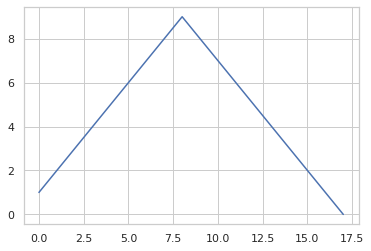

In [102]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

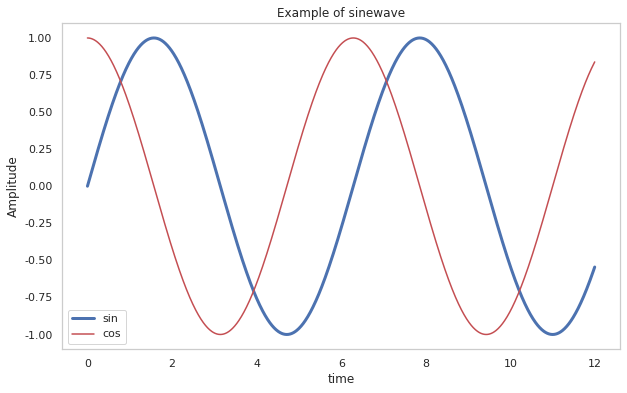

In [110]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

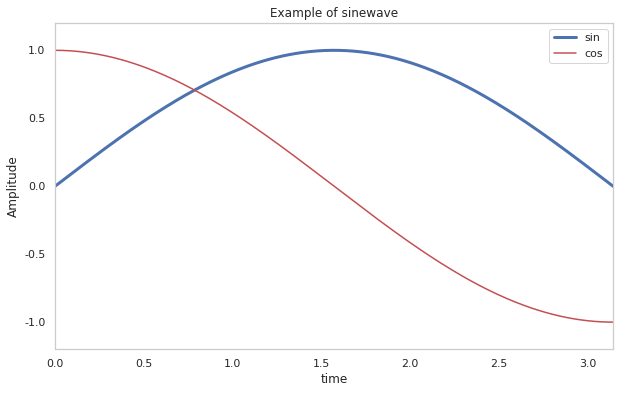

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

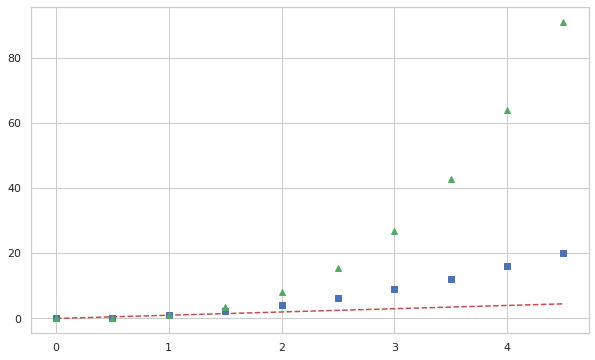

In [113]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

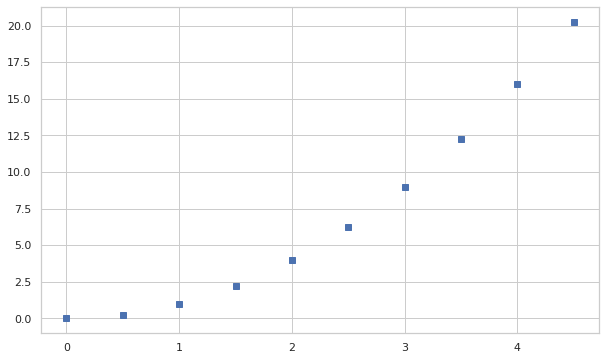

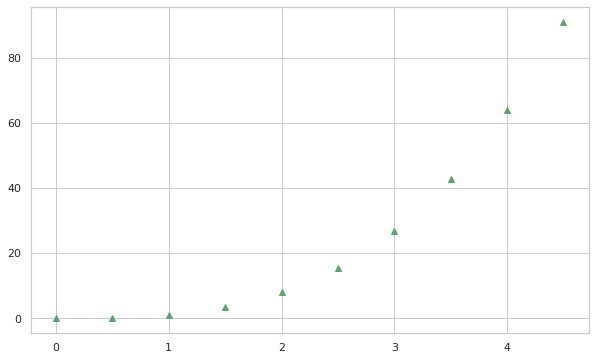

In [114]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

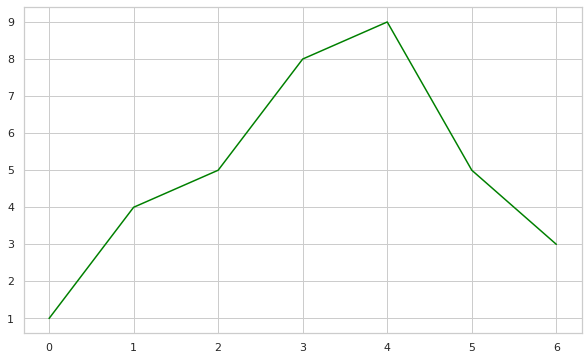

In [115]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

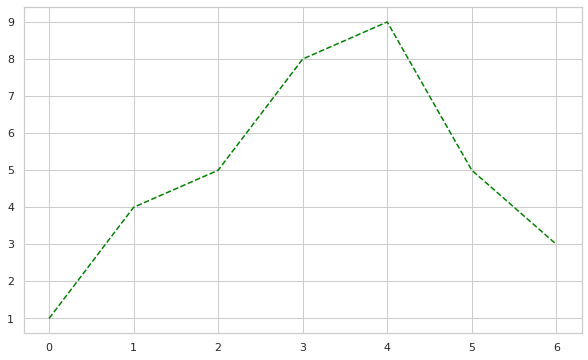

In [116]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

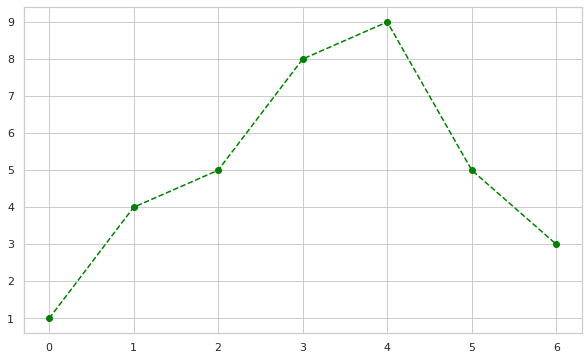

In [117]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

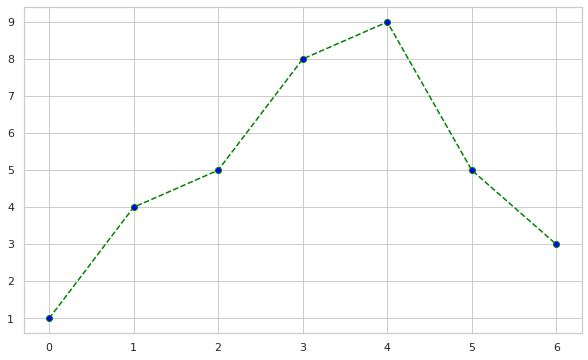

In [118]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

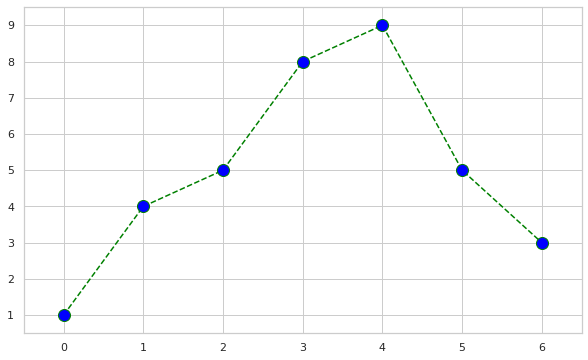

In [119]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [120]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

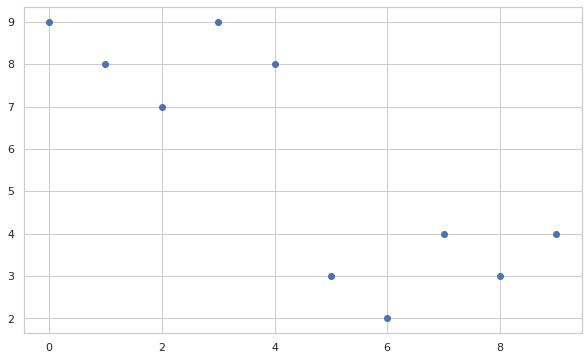

In [121]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

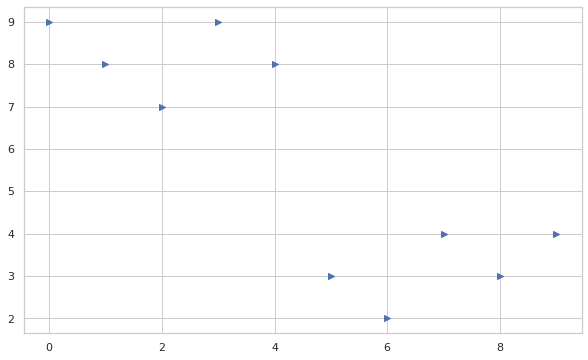

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

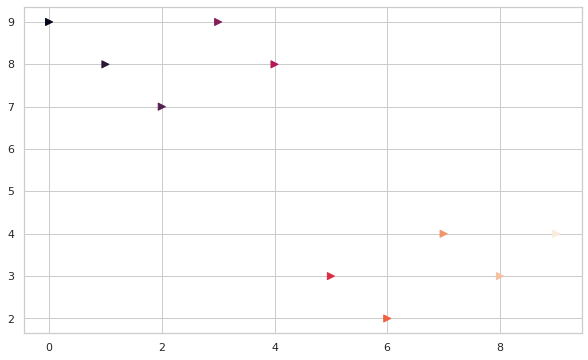

In [123]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

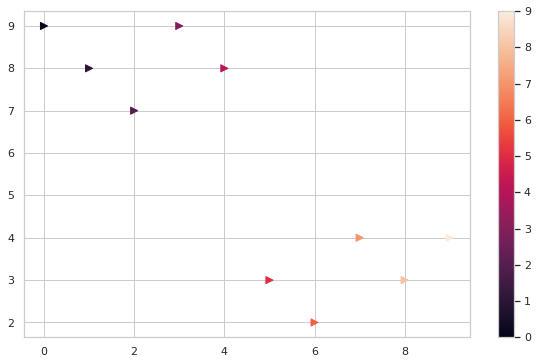

In [124]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [125]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

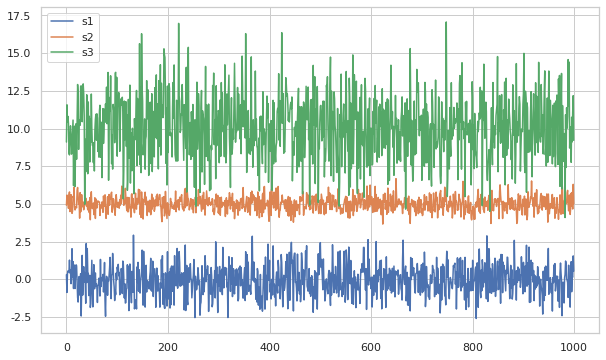

In [126]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

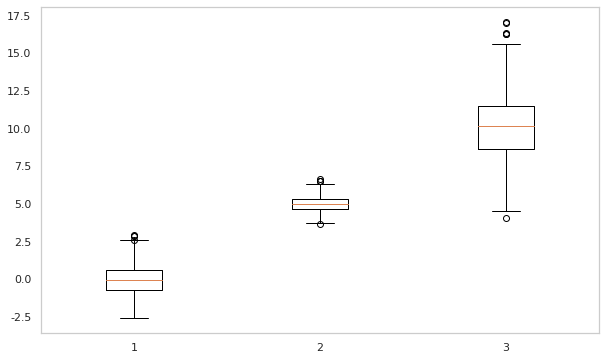

In [127]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

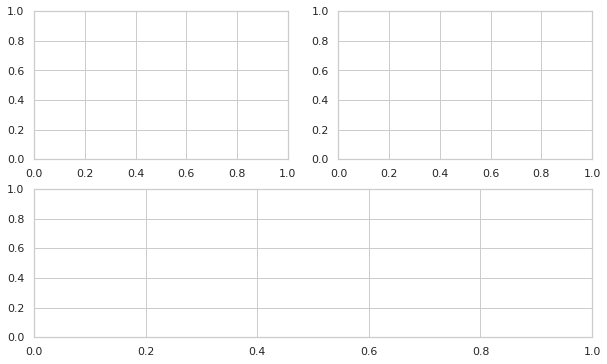

In [128]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

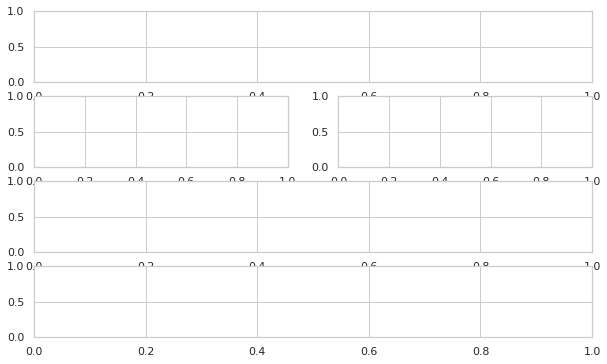

In [129]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

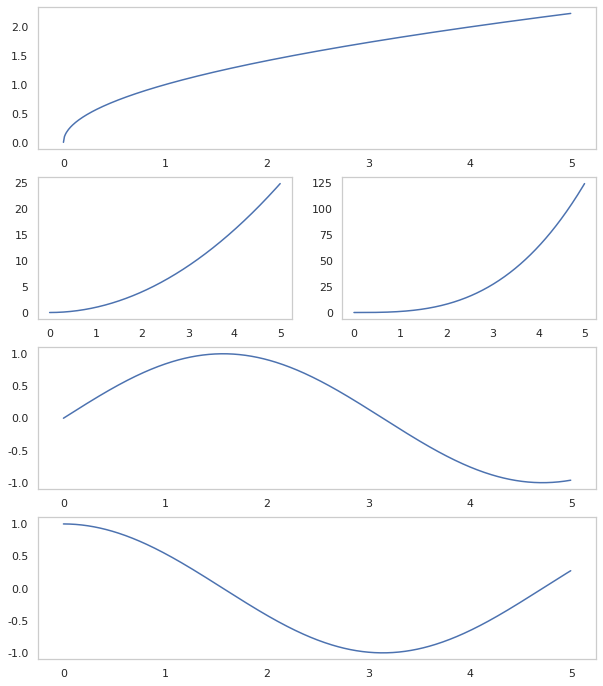

In [130]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [131]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [132]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020
강동구,1879,348.184818,431920,427573,4347,58770,1.006436,13.606686
강북구,1265,326.337449,322915,319164,3751,58196,1.161606,18.022080
강서구,1617,513.698630,603611,596949,6662,79660,1.103691,13.197241
관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970


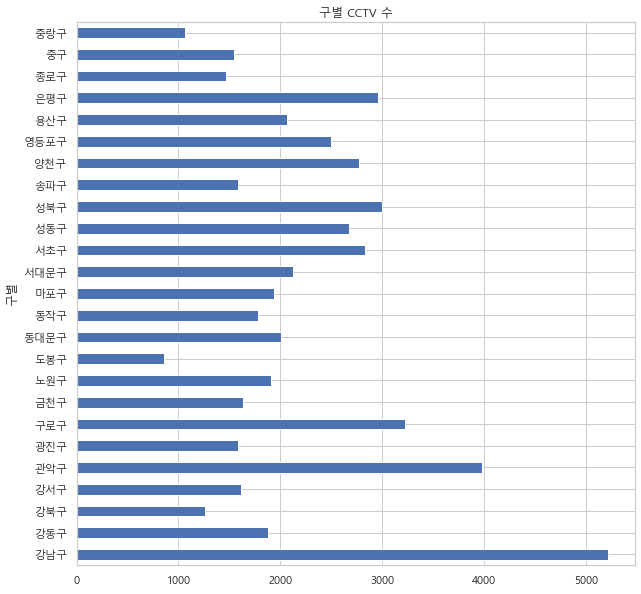

In [136]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.title('구별 CCTV 수')
plt.show()

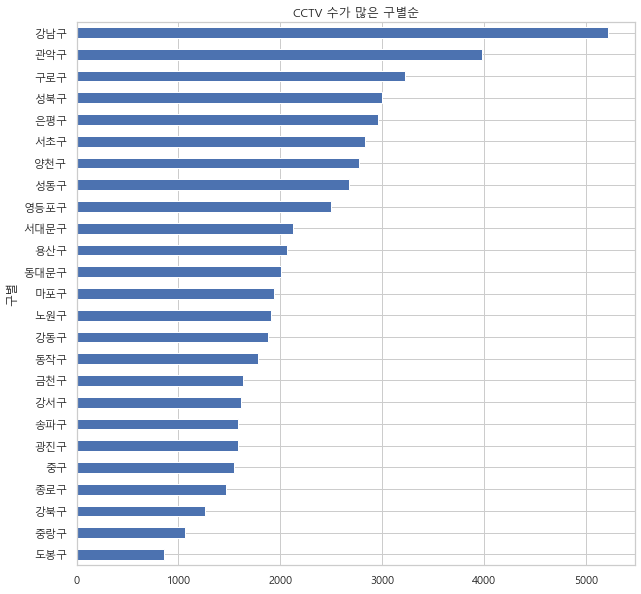

In [137]:
# 정렬된 수평bar
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.title('CCTV 수가 많은 구별순')
plt.show()

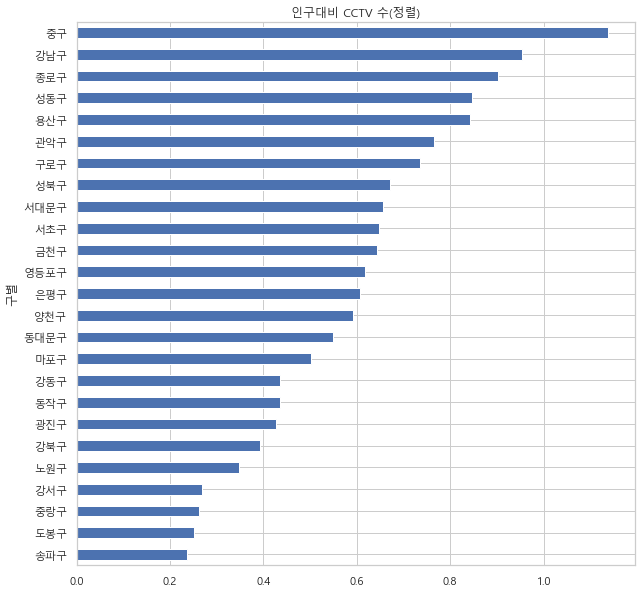

In [138]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.title('인구대비 CCTV 수(정렬)')
plt.show()

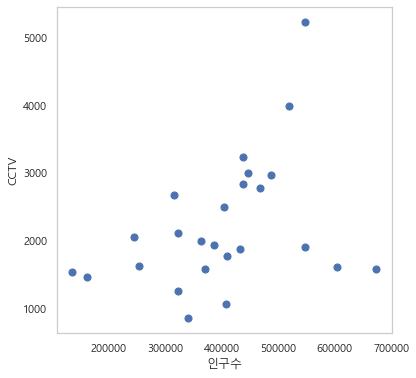

In [139]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [140]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.85240371e-03, 1.07309855e+03])

In [141]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

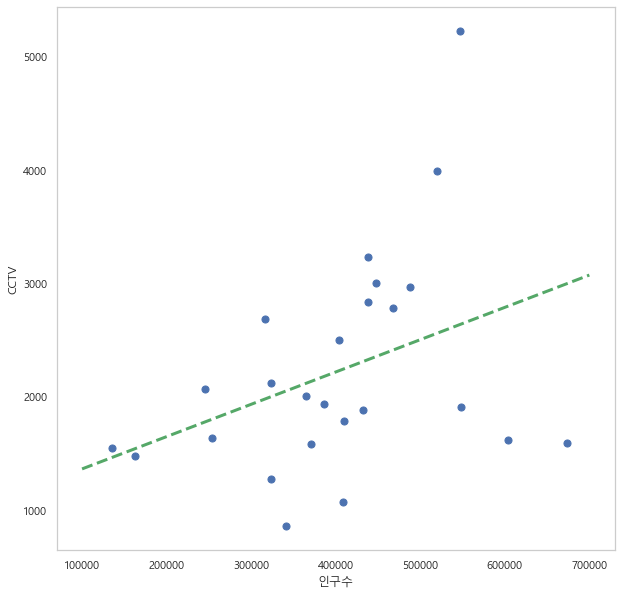

In [142]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [145]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.to_csv('data/01. CCTV_result_2018.csv')
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,142.283951,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
관악구,3985,716.279070,520040,501957,18083,72249,3.477233,13.892970,0.766287,1428.537426
송파구,1586,133.166667,673507,666635,6872,81364,1.020331,12.080647,0.235484,1408.212414
도봉구,858,297.969543,341649,339413,2236,55964,0.654473,16.380554,0.251135,1189.619423
강서구,1617,513.698630,603611,596949,6662,79660,1.103691,13.197241,0.267888,1177.840805


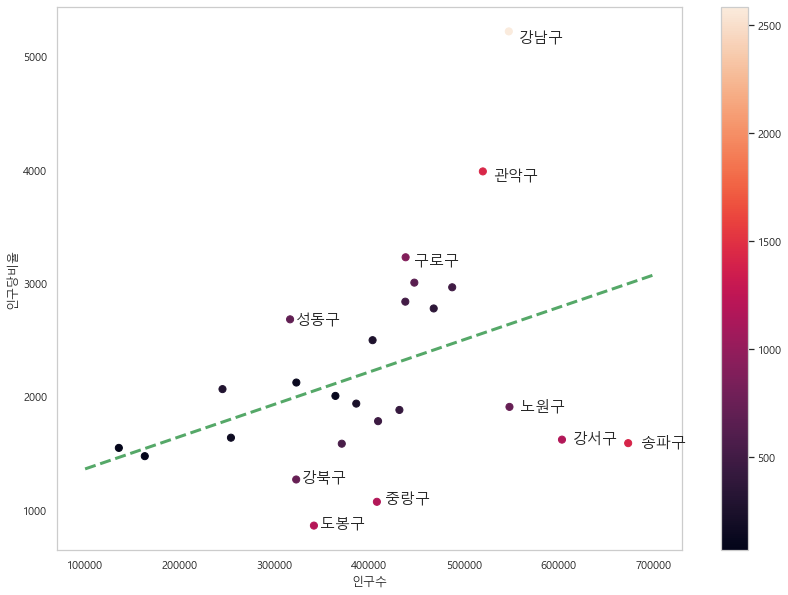

In [144]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 관악구, 구로구, 성동구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 중랑구는 다른 구에 비해 CCTV 비율이 낮다